In [113]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import sqlite3 as sql

a4_dims = (11.7, 8.27)

In [114]:
def fetch_axes(db_conn, query, *args):
    return list(zip(*db_conn.cursor().execute(query,args)))

# Distribution of $\frac{h}{h_{max}}$ of failed and succeeded search runs.

In [115]:
query_failed = """
SELECT entropy
FROM search_run
WHERE last_unsat > 0
"""

query_succeeded = """
SELECT entropy
FROM search_run
WHERE last_unsat = 0
"""

def get_entropy_dist(file):
    with sql.connect(file) as conn:
        failures, = fetch_axes(conn, query_failed)
        successes, = fetch_axes(conn, query_succeeded)
        return failures, successes
    
def plot_dist(failures, successes):
    fix, ax = plt.subplots(figsize=a4_dims)
    sns.distplot(failures, ax = ax, label='failed runs', axlabel='Entropy');
    sns.distplot(successes, ax = ax, label='succeeded runs', axlabel='Entropy');
    ax.legend();
    ax.grid();
    
def plot_entropy_dist(file):
    fs, ss = get_entropy_dist(file)
    plot_dist(fs, ss)

## Concerning $k = 3$, $v = 500$, $r = 4.1$

/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


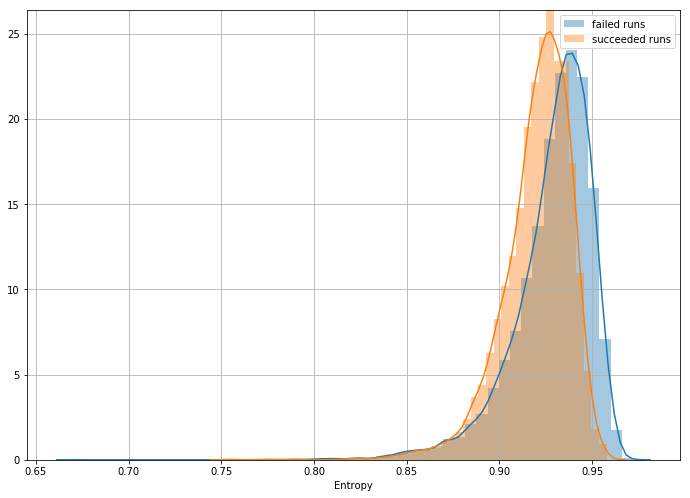

In [116]:
plot_entropy_dist('data/k3-v500-r4.1.raw.db');

## Concerning $k = 3$, $v = 500$, $r = 4.2$

/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


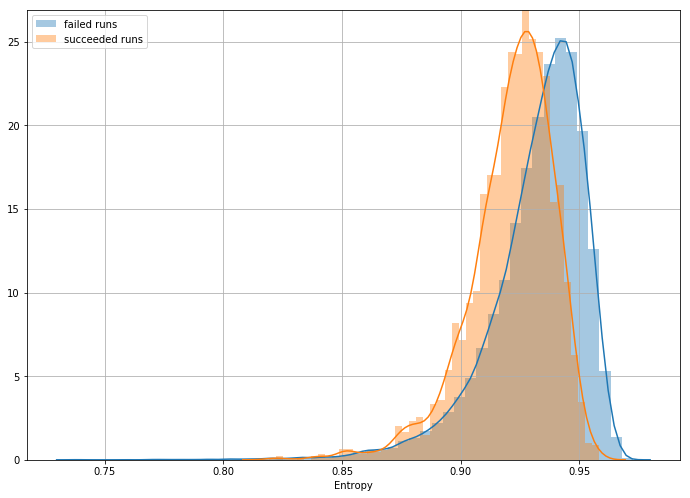

In [117]:
plot_entropy_dist('data/k3-v500-r4.2.raw.db');

# Concerning $k = 3$, $v = 500$, $r = 4.1$ with early restarts

/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


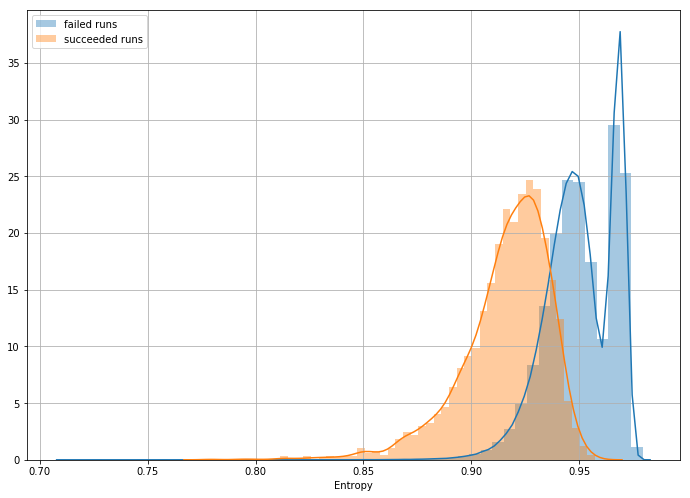

In [118]:
plot_entropy_dist('data/k3-v500-r4.1-er.raw.db');

# Concerning $k = 3$, $v = 500$, $r = 4.2$ with early restarts

# plot_entropy_dist('data/k3-v500-r4.2-er.raw.db');